### IMDB 리뷰 데이터셋
IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋이다. 총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있다.

- 자연어 처리와 말뭉치란 무엇인가?
    - 자연어 처리(natural language processing, NLP)는 컴퓨터를 사용해 인간의 언어를 처리하는 분야이다. 대표적인 세부 분야로는 음성 인식, 기계번역, 감성 분석등이 있다. IMDB 리뷰를 감성평에 따라 분류하는 작업은 감성 분석에 해당한다. 자연어 처리 분야에서는 훈련 데이터를 종종 말뭉치 corpus라고 부른다. 예를 들어 IMDB 리뷰 데이터셋이 하나의 말뭉치 이다.

사실 텍스트 자체를 신경망에 전달하지는 않는다. 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터이다. 앞서합성곱 신경망에서 이미지를 다룰 때는 특별한 변환을 하지 않는다. 이미지가 정수 픽셀값으로 이루어져 있기 때문이다. 텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것이다.

예를들어 'he'를 10으로 매핑하고 'cat'을 13에 매핑하더라고 'cat'이 'he'보다 좋거나 크다는 뜻이 아니다. 이 정숫값 사이에는 어떤 관계도 없다. 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리한다. 이렇게 분리된 단어를 **토큰 token** 이라고 부른다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스탬프에 해당한다.

간단한 문제라면 영어 말뭉치에서 토큰을 단어와 같게 봐도 좋다. 한국어는 조금 다르다.

- 한글 문장은 어떻게 토큰을 분리하나요?
    - 한글은 조사가 발달되어 있기 때문에 공백으로 나누는 것만으로 부족하다. 일반적으로 한글은 형태소 분석을 통해 토큰을 만든다. KoNLPy를 참고

토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되어 있는 경우가 많다. 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰을 나타낸다.

- 어휘 사전은 무엇인가?
    - 훈련 세트에서 고유한 단어를 뽑아 만든 목록을 어휘 사전이라고 말한다. 예를 들어 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환하여 신경망 모델에 주입한다.
    
실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어있다. tensorflow.keras.datasets 패키지 아래 imdb 모듈을 임포트하여 이 데이터를 적재해 보겠다. 여기에서는 전체 데이터셋에서 가장 자주 등장하는 단어 300개만 사용하겠다. 이렇게 하기 위해 load_data() 함수의 num_words 매개변수를 300으로 지정한다.

In [1]:
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=300)

In [2]:
print(X_train.shape, X_test.shape)

(25000,) (25000,)


앞서 말했듯이 이 데이터셋은 훈련 세트와 테스트 세트가 각각 25,000 개의 샘플로 이루어져 있다. 

그런데 배열이 1차원인 게 이상하지 않나? IMDB 리뷰 텍스트는 길이가 제각각이다. 따라서 고정 크기의 2차원 배열에 담기 보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리르 효율적으로 사용할 수 있다. 즉 앞의 그림처럼 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열이다.(p.502)

넘파이 배열은 정수가 실수 외에도 파이썬 객체를 담을 수 있다. 그럼 다음과 같이 첫 번째 리뷰의 길이를 출력해 보자.

In [3]:
print(len(X_train[0]))

218


첫 번째 리뷰의 길이는 218개의 토큰으로 이루어져 있다. 두 번째 리뷰의 길이를 확인해 보자.

In [4]:
print(len(X_train[1]))

189


몇 개 더 해볼 수도 있겠지만 리뷰마다 각각 길이가 다르다. 여기서 하나의 리뷰가 하나의 샘플이 된다. 

서로 다른 길이의 샘플을 어떻게 신경망에 전달하는지 잠시 후 살펴본다. 이제 첫 번째 리뷰에 담긴 내용을 출력해 보자.

In [5]:
print(X_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


앞서 설명했듯이 텐서플로에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있다. 앞서 num_words=500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어가 있다. 따라서 어휘 사전에 없는 단어는 모두 2로 표시 되어 나타난다.

- 어떤 기준으로 500개의 단어를 고른것인가?
    - imdb.load_data() 함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 500개의 단어를 선택한다.
    
이번에는 타깃 데이터를 출력해 보자.

In [6]:
print(y_train[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


해결할 문제는 리뷰가 긍정인지 부정인지를 판단하는 거다. 그러면 이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정)과 1(긍정)로 나누어진다.

데이터를 더 살펴보기 전에 훈련 세트에서 검증 세트를 떼어 놓도록 하자. 원래 훈련 세트의 크기가 25,000개였으므로 20%를 검증 세트로 떼어 놓으면 훈련 세트의 크기는 20,000개로 줄어들 것이다.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

이제 훈련 세트에 대해 몇 가지 조사를 해 보겠다. 

먼저 각 리뷰의 길이를 계산해 넘파이 배열에 담자. 이렇게 하는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하고 싶기 때문이다. 

이를 위해 넘파이 리스트 내포를 사용해 train_input의 원소를 순회하면서 길이를 재도록 하겠다.


In [8]:
import numpy as np
lengths = np.array([len(x) for x in X_train])

lengths 배열이 준비되었으므로 넘파이 mean() 함수와 mediad() 함수를 사용해 리뷰 길이의 평균과 중간값을 구해보자.

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 단어 개수는 239개이고 중간값이 178인 것으로 보아 이 리뷰 길이 데이터는 한쪽에 치우친 분포를 보일 것 같다. 

lengths 배열을 히스토그램으로 표현해 보자.

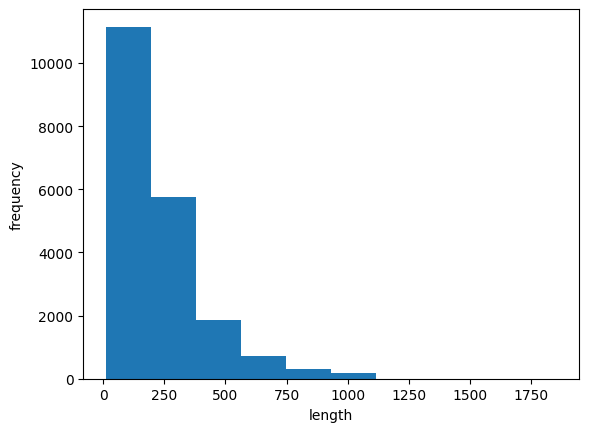

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

역시 한쪽으로 치우쳤다. 대부분의 리뷰 길이는 300 미만이다. 평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 있기 때문이다. 어떤 리뷰는 1,000개의 단어가 넘기도 한다.

리뷰는 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용하겠다. 하지만 여전히 100개의 단어보다 작은 리뷰가 있다. 이런 리뷰들의 길이를 100에 맞추기 위해 패딩이 필요하다. **보통 패딩을 나타내는 토큰으로는 0을 사용한다.**

물론 수동으로 훈련 세트에 있는 20,000개의 리뷰를 순회하면서 길이가 100이 되도록 잘라내거나 0으로 패딩 할 수 있다. 하지만 자주 있는 번거로운 작업에는 항상 편리한 도구가 준비되어 있다. 케라스는 시퀀스 데이터의 길이를 맞추는 ***pad_sequences()함수*** 를 제공한다. 이 함수를 사용해 train_input의 길이를 100으로 맞추어 보겠다.

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(X_train, maxlen=100)

사용법은 간단하다. maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩 한다. 

패딩 된 결과가 어떻게 나타나는지 확인해 보겠다. 먼저 train_seq의 크기를 확인해 보자

In [12]:
print(train_seq.shape)

(20000, 100)


train_input은 파이썬 리스트의 배열이었지만 길이를 100으로 맞춘 train_seq는 이제 (20000, 100) 크기의 2차원 배열이 되었다. 
##### (샘플 개수 20000개, 토큰(타임스탭)개수 100개(단어개수))

train_seq에 있는 첫 번째 샘플을 출력해 보자.

In [13]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


이 샘플의 **앞뒤에 패딩값 0이 없는 것으로 보아 100보다는 길었을 것 같다.** 

그럼 원래 샘플의 앞부분이 잘렸을까? 뒷부분이 잘렸을까? train_input에 있는 원본 샘플의 끝을 확인해 보자.

In [14]:
print(X_train[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


음수 인덱스와 슬라이싱을 사용해 train_input[0]에 있는 마지막 10개의 토큰을 출력했다. train_seq[0]의 출력값과 비교하면 정확히 일치한다. **그렇다면 샘플의 앞부분이 잘렸다는 것을 짐작할 수 있겠다.**

***pad_sequences()함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자른다. 이렇게 하는 이유는 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문이다.***

.


영화 리뷰 데이터를 생각해 보면 리뷰 끝에 뭔가 결정적인 소감을 말할 가능성이 높다고 볼 수 있다. 만약 시퀀스의 뒷부분을 잘라내고 싶다면 **pad_sequences()함수의 truncating 매개변수의 값을 기본값 'pre'가 아닌 'post'로** 바꾸면 된다.

이번에는 train_seq에 있는 여섯 번째 샘플을 출력해 보자.

In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


***앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안된다.*** 역시 같은 이유로 패딩 토큰은 시퀀스의 뒷부분이 아니라 앞부분에 추가된다. 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에서 가장 큰 영향을 미치게 되므로 마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않는다. 하지만 원한다면 pad_sequences()함수의 padding 매개변수의 기본값인 'pre'를 'post'로 바꾸면 샘플의 뒷부분에 패딩을 추가할 수 있다.


그럼 이런 방식대로 검증 세트의 길이도 100으로 맞추어 보자.

In [16]:
val_seq = pad_sequences(X_val, maxlen=100)

이제 훈련세트와 검증세트 준비를 마쳤다. 이제 본격적으로 순환 신경망 모델을 만들어 보자.

### 순환 신경망 만들기
케라스는 여러 종류의 순환층 클래스를 제공한다. 그중에 가장 간단한 것은 **simpleRNN 클래스**이다. 이 클래스는 7장 1절에서 설명한 것과 거의 비슷한 기능을 수행한다. 

***IMDB 리뷰 분류 문제는 이진 분류이므로 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용해야 한다.*** 먼저 케라스의 Sequential 클래스 만든 신경망 코드를 살펴보자.

In [17]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

이 코드는 지금까지 보았던 구성과 매우 비슷한다. 달라진 것은 Dense나 Conv2D 클래스 대신 simpleRNN 클래스를 사용했다. 첫 번째 매개변수는 사용할 뉴런의 개수로 input_shape에 입력 차원은 (100,300)으로 지정했다. ***첫 번째 차원이 100인 것은 앞에서 샘플의 길이를 100으로 지정했기 때문이다.*** 그럼 300은 어디서 온 숫자일까? 잠시후에 설명하겠다

    
순환층도 당연히 활성화 함수를 사용해야 한다. simpleRNN 클래스의 actication 매개변수의 기본값은 'tanh'로 하이퍼볼릭 탄젠트 함수를 사용한다. 여기서는 기본값을 그대로 사용한다.

그럼 imput_shape의 두 번째 차원인 300은 어디서 온 숫자일까? ***이전 섹션에서 만든 train_seq와 val_seq에는 한 가지 큰 문제가 있다. 토큰을 정수로 변환한 이 데이터를 신경망에 주힙하면 큰 정수가 큰 활성화 출력을 만들기 때문이다.***

분명히 이 정수 사이에는 어떤 관련이 없다. 20번 토큰을 10번 토큰보다 더 중요시해야 할 이유가 없다. 따라서 순순한 정숫값을 신경망에 입력하기 위해서는 다른 방식을 찾아야 한다.

정숫값에 있는 크기 속성을 없애고 각 정수를 고류하게 표현하는 방법은 7장에서 잠간 보았던 원-핫 인코딩이다. 예를 들어 train_seq[0]의 첫 번째 토큰인 10을 원-핫 인코딩으로 바꾸면 다음과 같다.

원-핫 인코딩은 정숫값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 모두 0으로 변환한다. 7장의 다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피 손실을 계산하기 위해 원-핫 인코딩을 사용할 수 있다고 배웠다.
열한 번째 원소만 1이고 나머지는 모두 0인 배열이다. 이 배열의 길이는 얼마일까?

**imbd.load_data() 함수에서 300개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 300개이다.** 즉 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0(패딩토큰)에서 299까지이다. 따라서 **이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 300이어야 한다.**

7장 1절에서 'I am a boy"에 있는 각 단어를 숫자 3개를 사용해 표현한다고 예를 들었던 것을 기억하나? 여기에도 개념을 동일 하다. 토큰마다 300개의 숫자를 사용해 표현하는 것이다. 다만 300개 중에 하나만 1이고 나머지 모두 0으로 만들어 정수 사이에 있던 크기 속성을 없애는 원-핫 인코딩을 사용한다.

혹시 예상했을 수 있겠지만 케라스에는 이미 원-핫 인코딩을 위한 유틸리티를 제공한다. 따라서 수동으로 위와 같은 배열을 만들 필요가 없다. 이 유틸리는 바로 keras.utils 패키지 아래에 있는 to_categorical()함수이다. 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환해 준다.

In [18]:
train_oh = keras.utils.to_categorical(train_seq)

먼저 train_seq를 원-핫 인코딩으로 변환하여 train_oh 배열을 만들었다. 이 배열의 크기를 출력해 보자.

In [19]:
print(train_oh.shape)

(20000, 100, 300)


정수 하나마다 모두 300차원의 배열로 변경되었기 때문에 (20000, 100) 크기의 train_seq가(20000, 100, 300) 크기의 train_oh로 바뀌었다. 

***이렇게 샘플 데이터의 크기가 1차원 정수 배열(100,)에서 2차원 배열(100,300)로 바꿔야 하므로 SimpleRNN 클래스의 input_shape 매개변수의 값을 (100,300)으로 지정한 것이다.***

train_oh의 첫 번째 샘플의 첫 번째 토큰이 10이 잘 인코딩되었는지 출력해보자.(위에서 보면 train_seq 배열의 첫번째 원소(토큰)이 10임)

In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


처음 12개 원소를 출력해 보면 열한 번째 원소가 1인 것을 확인할 수 있다. 나머지 원소는 모두 0일까? 넘파이 sum()함수로 모든 원소의 값을 더해서 1이 되는지 확인해 보자.

In [21]:
print(np.sum(train_oh[0][0]))

1.0


토큰 10이 잘 인코딩 되었다. 열한 번째 원소만 1이고 나머지 모두 0이어서 원-핫 인코딩된 배열의 값을 모두 더한 결과가 1이 되었다. 같은 방식으로 val_seq도 원-핫 인코딩으로 바꾸어 놓겠다.

In [22]:
val_oh = keras.utils.to_categorical(val_seq)

이제 훈련에 사용할 훈련 세트와 검증 세트가 모두 준비되었다. 앞서 만든 모델의 구조를 출력해 보자.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


SimplrRNN에 전달할 샘플의 크기는 (100, 300) 이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력한다. 이 때문에 출력 크기가 순환층의 뉴런 개수(아까 층 만들 때 지정함)와 동일한 8임을 확인 할 수 있다.


순환층에 사용된 모델 파라미터의 개수를 계산해보자. 입력 토큰은 300차원의 원-핫 인코딩 배열이다. 이 배열의 순환층의 뉴런 8개와 완전히 연결 되기때문에 총 300 x 8 = 2400개의 가중치가 있다. 순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해진다.

이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8 (은닉 상태 크기) x 8(뉴런개수) = 64개의 가중치가 필요하다. 마지막으로 뉴런마다 하나의 절편이 있다. 따라서 모두 2400 + 64 + 8 = 2472개의 모델 파라미터가 필요하다.


케라스 API를 사용해 순환 신경망 모델을 손쉽게 만들었다. 이전에 만들었던 완전 연결 신경망에 비해 크게 바뀐 것은 없다. Dense 층 대신에 SimpleRNN 층을 사용했고 입력 데이터의 차원을 원-핫 인코딩으로 바꾸어 주었다. 다음 섹션에서 이 순환 신경망 모델을 훈련해 보자.

### 순환 신경망 훈련하기
순환 신경망의 훈련은 완전 연결 신경망이나 합성곱 신경망과 크게 다르지 않다. 모델을 만드는 것은 달라도 훈련하는 방법은 모두 같다. 이것이 케라스 API를 사용하는 장점이다. 다음 코드처럼 모델을 컴파일 하고 훈련하는 전체 구조가 동일하다.


이 예에서는 기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 별도의 RMSprop 객체를 만들어 학습률을 0.0001로 지정하였다. 그다음 에포크 횟수를 100으로 늘리고 배치 크기는 64개로 설정했다. 그 밖에 체크포인트와 조기 종료를 구성하는 코드는 거의 동일하다.

맥에서는 keras.optimizers.RMSprop 가 느리게 동작하므로 keras.optimizers.legacy.RMSprop로 대체

In [24]:
rmsprop = keras.optimizers.legacy.RMSprop(learning_rate=1e-4)  
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, y_train, epochs=100, batch_size=64, \
                    validation_data=(val_oh, y_val), \
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 3s 7ms/step - loss: 0.6995 - accuracy: 0.5024 - val_loss: 0.6997 - val_accuracy: 0.4980
Epoch 2/100
 26/313 [=>............................] - ETA: 1s - loss: 0.6959 - accuracy: 0.5066

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 7ms/step - loss: 0.6968 - accuracy: 0.5096 - val_loss: 0.6978 - val_accuracy: 0.4996
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6950 - accuracy: 0.5141 - val_loss: 0.6965 - val_accuracy: 0.5028
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6936 - accuracy: 0.5185 - val_loss: 0.6954 - val_accuracy: 0.5052
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6925 - accuracy: 0.5234 - val_loss: 0.6947 - val_accuracy: 0.5084
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6916 - accuracy: 0.5275 - val_loss: 0.6941 - val_accuracy: 0.5088
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6907 - accuracy: 0.5314 - val_loss: 0.6936 - val_accuracy: 0.5108
Epoch 8/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6899 - accuracy: 0.5356 - val_loss: 0.6931 - val_accuracy: 0.5136
Epoch 9/100

313/313 [==============================] - 2s 7ms/step - loss: 0.4946 - accuracy: 0.7723 - val_loss: 0.5288 - val_accuracy: 0.7438
Epoch 60/100
313/313 [==============================] - 2s 7ms/step - loss: 0.4934 - accuracy: 0.7729 - val_loss: 0.5279 - val_accuracy: 0.7452
Epoch 61/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4919 - accuracy: 0.7728 - val_loss: 0.5267 - val_accuracy: 0.7488
Epoch 62/100
313/313 [==============================] - 2s 7ms/step - loss: 0.4903 - accuracy: 0.7742 - val_loss: 0.5257 - val_accuracy: 0.7470
Epoch 63/100
313/313 [==============================] - 2s 7ms/step - loss: 0.4890 - accuracy: 0.7760 - val_loss: 0.5257 - val_accuracy: 0.7484
Epoch 64/100
313/313 [==============================] - 2s 7ms/step - loss: 0.4875 - accuracy: 0.7772 - val_loss: 0.5239 - val_accuracy: 0.7492
Epoch 65/100
313/313 [==============================] - 2s 7ms/step - loss: 0.4862 - accuracy: 0.7778 - val_loss: 0.5237 - val_accuracy: 0.7486
Epoch

이 훈련은 76번째 에포크에서 조기 종료되었다. 검증 세트에 대한 정확도는 약 80% 정도이다. 매우 뛰어난 성능은 아니지만 감상평을 분류하는 데 어느 정도 성과를 내고 있다고 판단할 수 있다.

그럼 이전 장에서처럼 훈련 손실을 그래프로 그려서 훈련 과정을 살펴보겠다.

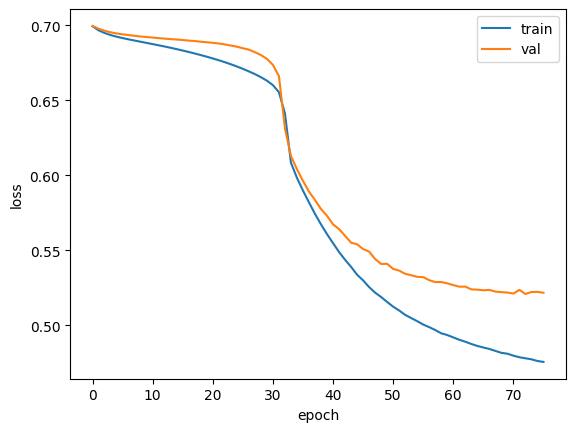

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 손실은 꾸준히 감소하고 있지만 검증 손실은 대략 스무 번째 에포크에서 가소가 둔해지고 있다. 적절한 에포크에서 훈련을 멈춘 것 같다. 1절에서 배원 순환 신경망을 성공적으로 훈련시켜서 IMDB 리뷰 데이터를 긍정과 부정으로 분류하는 작업을 수행했다.


여기서 한 가지 생각할 점이 있다. 이 작업을 하기 위해서 입력 데이터를 원-핫 인코딩으로 변환했다. **원-핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 것이다.** 실제로 train_seq 배열과 train_oh 배열의 nbytes 속성을 출력하여 크기를 확인해 보자.

In [26]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 2400000000


토큰 1개를 300차원으로 늘렸기 때문에 대략 300배가 커진다. 이는 썩 좋은 방법은 아닌 것 같다. 훈련 데이터가 커질수록 더 문제가 될 것이다. 다음 섹션에서 순환 신경망에 사용하는 더 좋은 단어 표현 방법을 알아보도록 하자.

### 단어 임베딩을 사용하기
순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은**단어 임베딩 word embedding** 이다. 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다.

***이런 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩 된 벡터보다 훨씬 의미 있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많다.*** 물론 이런 당어 임베딩 벡터를 만드는 층은 이미 준비되어 있다. 케라스에서는 keras.layers 패키지 아래 Embedding 클래스로 임베딩 기능을 제공한다. 이 클래스를 다른 층처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화되지만 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습한다.

단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것이다. 즉 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용 할 수 있다. 이 때문에 메모리를 훨씬 효율적으로 사용할 수 있다.

앞서 원-핫 인코딩은 샘플 하나를 300차원으로 늘렸기 때문에 (100,) 크기의 샘플이 (100, 300)으로 커졌다. 이와 비슷하게 임베딩도 (100,)크기의 샘플을 (100,20)과 같이 2차원 배열로 늘린다. 하지만 원-핫 인코딩과는 달리 훨씬 작은 크기로도 단어를 잘 표현할 수 있다.

Embedding 클래스를 SimpleRNN 층 앞에 추가한 두 번째 순환 신경망을 만들어 보겠다.

In [53]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

1. Embedding 클래스의 첫 번째 매개변수(300)는 어휘 사전의 크기이다. 앞서 IMDB 리뷰 데이터셋에서 300개의 단어만 사용하도록 imdb.load_data(num_words=300)과 같이 설정했기 때문에 이 매개변수의 값을 300으로 지정한다.

2. 두 번째 매개변수(16)는 임베딩 벡터의 크기이다. 여기에서는 원-핫 인코딩보다 훨씬 작은 크기(16)의 벡터를 사용했다. 

3. 세 번째 input_length 매개변수는 입력 시퀀스의 길이이다. 앞서 샘플의 길이를 100으로 맞추어 train_seq를 만들었다. 따라서 이 값을 100으로 지정한다.

그다음 SimpleRNN 층과 Dense층은 이전과 동일하다. 이 모델의 구조를 출력해 보자.

In [54]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           4800      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


summary() 메서드의 출력에서 알 수 있듯이 이 모델은 (100,) 크기의 입력을 받아 (100,16) 크기의 출력을 만든다. 이 모델에서 사용되는 모델 파라미터 개수를 계산해 보자.

Embedding 클래스는 300개의 각 토큰을 크기가 16인 벡터로 변경하기 때문에 총 300 x 16 = 4,800개의 모델 파라미터를 가진다. 그다음 SimpleRNN층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치 16 x 8 =128 개를 가진다. 또한 은닉 상태에 곱해지는 가중치 8 x 8 = 64 개가 있다. 마지막으로 8개의 절편이 있으므로 이 순환층에 있는 전체 모델 파라미터의 개수는 128+64+8 = 200개 이다.

마지막 Dense 층의 가중치 개수는 이전과 동일하게 9개이다. 원-핫 인코딩보다 SimpleRNN에 주입되는 입력의 크기가 크게 줄었지만 임베딩 벡터는 단어를 잘 표현하는 능력이 있기 때문에 훈련 결과는 이전에 못지 않을 것이다. 모델 훈련 과정은 이전과 동일하다.

In [55]:
rmsprop = keras.optimizers.legacy.RMSprop(learning_rate=1e-4)  
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, y_train, epochs=100, batch_size=64, \
                    validation_data=(val_seq, y_val), \
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.6805 - accuracy: 0.5627 - val_loss: 0.6583 - val_accuracy: 0.6212
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 0.6398 - accuracy: 0.6547 - val_loss: 0.6259 - val_accuracy: 0.6740
Epoch 3/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6165 - accuracy: 0.6944 - val_loss: 0.6121 - val_accuracy: 0.6970
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 0.6043 - accuracy: 0.7053 - val_loss: 0.6041 - val_accuracy: 0.7038
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 0.5940 - accuracy: 0.7154 - val_loss: 0.5931 - val_accuracy: 0.7158
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5853 - accuracy: 0.7216 - val_loss: 0.5860 - val_accuracy: 0.7150
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 0.5771 - accuracy: 0.7291 - val_loss: 0.5848 - val_accuracy: 0.7158

출력 결과를 보면 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냈다. 반면에 순환층의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄어들었다. 마지막으로 훈련 손실과 검증 손실을 그래프로 출력해 보자.

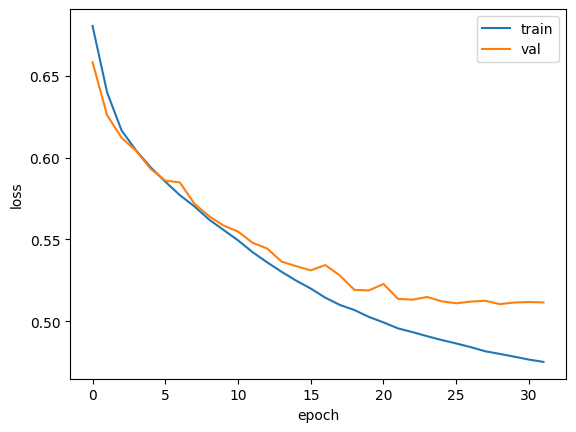

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증 손실이 더 감소되지 않아 훈련이 적절히 조기 종료된 것 같다. 이에 비해 훈련 손실은 계속 감소한다. 이를 더 개선할 방법이 있는지 다음 절에서 알아보자.